In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\justi\Downloads\Python Data Analysis Datasets\Uber Rides Data\Uber Request Data.csv",parse_dates=['Request timestamp','Drop timestamp'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [4]:
df.describe(include='all',datetime_is_numeric=True)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,NaN,NaN
top,NaN,City,NaN,Trip Completed,NaN,NaN
freq,NaN,3507,NaN,2831,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,2016-09-04 08:49:18.446849536,2016-09-05 17:03:26.523843072
min,1.000000,NaN,1.000000,NaN,2016-07-13 00:00:24,2016-07-13 00:01:12
25%,1691.000000,NaN,75.000000,NaN,2016-07-14 07:38:26,2016-07-14 08:10:24.500000
50%,3387.000000,NaN,149.000000,NaN,2016-07-15 13:44:15,2016-07-15 15:27:41
75%,5080.000000,NaN,224.000000,NaN,2016-11-07 19:00:00,2016-11-07 19:25:30
max,6766.000000,NaN,300.000000,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00


In [5]:
#how many nulls do we have in our data?
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing*100))

Request id - 0.0%
Pickup point - 0.0%
Driver id - 39.288361749444036%
Status - 0.0%
Request timestamp - 0.0%
Drop timestamp - 58.028169014084504%


<AxesSubplot:title={'center':'Trip Status Distibution'}>

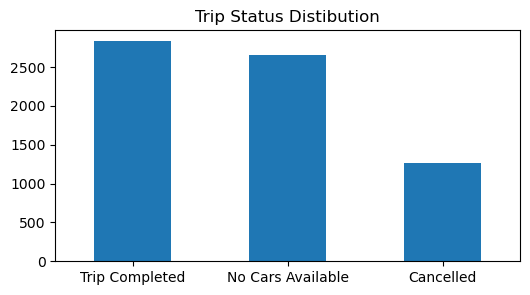

In [25]:
#Distribution of Trips by Status Type
df['Status'].value_counts().plot.bar(title='Trip Status Distibution',rot=0,figsize=(6,3))


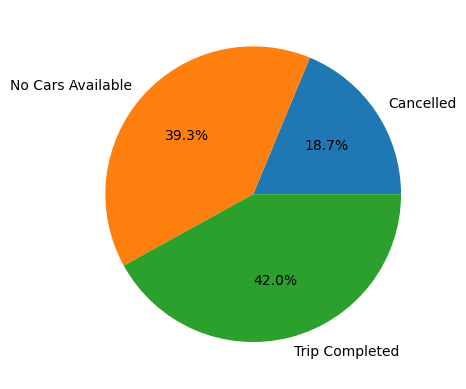

In [8]:
# Let's get the percentages in there 
size=df.groupby('Status')['Request id'].count().reset_index()
plt.pie(size['Request id'],labels=size['Status'],autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Pickup point,Status'>

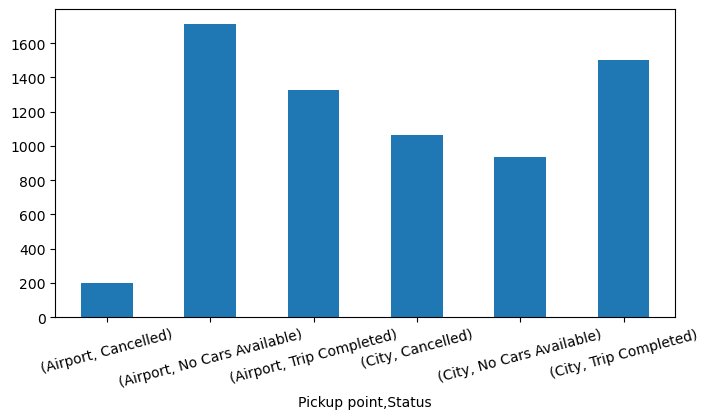

In [30]:
#Does a pickup point have a different trip status distribution that the other?
df.groupby(['Pickup point','Status'])['Request id'].size().plot.bar(rot=15,figsize=(8,4))

In [18]:
#let's get that insight into a percentage breakdown
pickup_grp=df.groupby('Pickup point')
pickup_grp['Status'].value_counts(normalize=True)*100

Pickup point  Status           
Airport       No Cars Available    52.903027
              Trip Completed       40.982088
              Cancelled             6.114886
City          Trip Completed       42.885657
              Cancelled            30.396350
              No Cars Available    26.717993
Name: Status, dtype: float64

In [12]:
#Now let's look at trip durations, start by adding a new Duration column
df['Duration']=(df['Drop timestamp']-df['Request timestamp']).dt.seconds/60
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Duration
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.000000
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.000000
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.000000
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.000000
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.516667


In [16]:
#Looking at some descriptive statistics
pickup_grp['Duration'].agg(['size','mean','median','min','max'])

,size,mean,median,min,max
Pickup point,,,,,
Airport,3238,52.238495,51.6,21.183333,82.066667
City,3507,52.568384,53.0,20.783333,83.000000


Text(0.5, 0, 'Minutes')

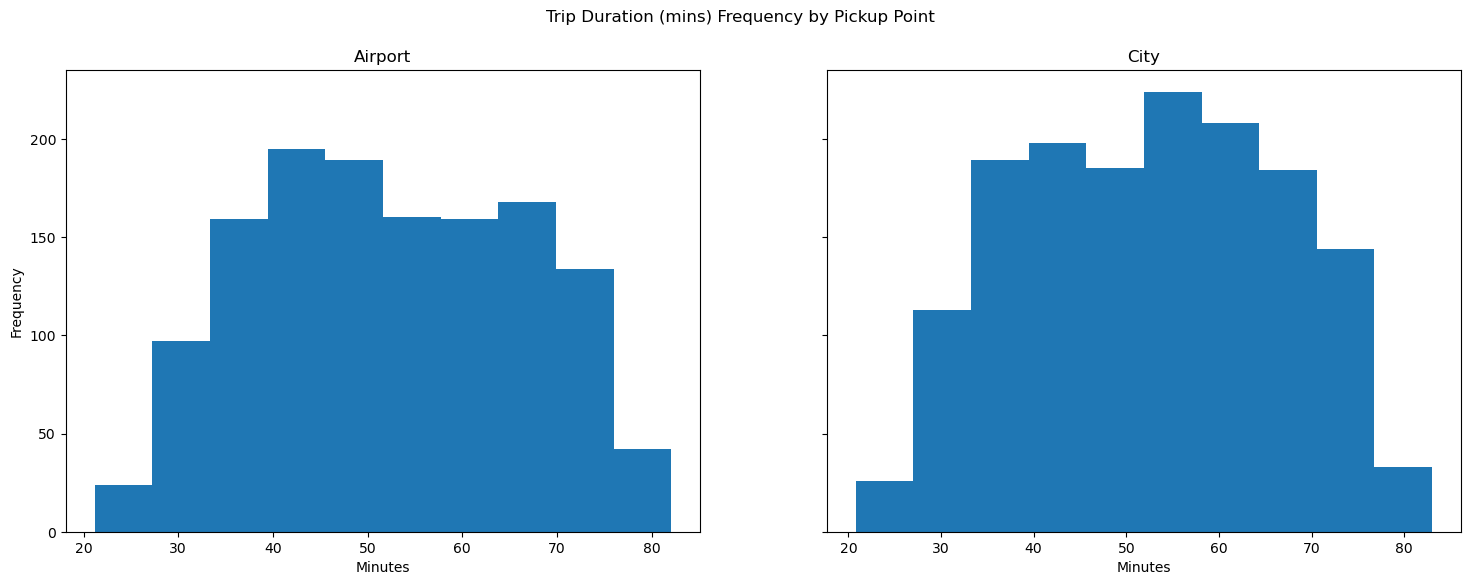

In [31]:
#Plot the trip duration frequency by pickup point
fig,ax = plt.subplots(1,2, sharey=True,figsize=(18,6))
fig.suptitle('Trip Duration (mins) Frequency by Pickup Point')
ax[0].hist(df_airport['Duration'])
ax[0].set_title('Airport')
ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Frequency')
ax[1].hist(df_city['Duration'])
ax[1].set_title('City')
ax[1].set_xlabel('Minutes')

<AxesSubplot:title={'center':'Distribution of Requests taken by a Driver'}, ylabel='Frequency'>

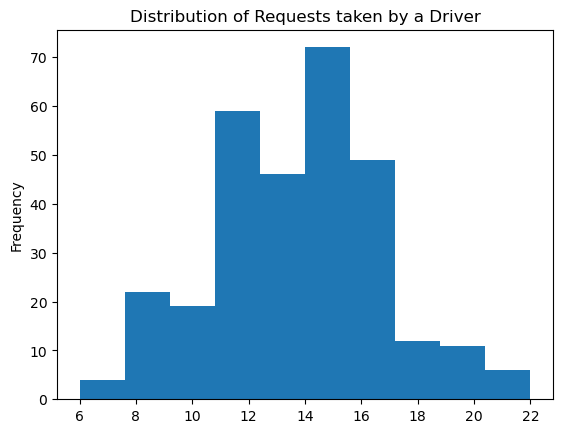

In [23]:
#Let's how many requests drivers have accepted
df.groupby('Driver id')['Request id'].count().plot.hist(xlabel='Requests', title='Distribution of Requests taken by a Driver')